In [21]:
import os
import time
import glob
import subprocess

def get_file_times(file_path):
    try:
        # Use subprocess to call the `stat` command
        result = subprocess.run(['stat', file_path], capture_output=True, text=True, check=True)
        output = result.stdout
        
        # Parse the last modified time and birth time
        mod_time_str = None
        birth_time_str = None
        
        for line in output.splitlines():
            if "Modify:" in line:
                mod_time_str = line.split("Modify:")[1].strip()
            if "Birth:" in line:
                birth_time_str = line.split("Birth:")[1].strip()

        # Handle microseconds part of the timestamps
        if mod_time_str:
            mod_time_str = mod_time_str.split('.')[0] + mod_time_str[19:26]
            mod_time = time.mktime(time.strptime(mod_time_str, "%Y-%m-%d %H:%M:%S.%f"))
        else:
            mod_time = os.path.getmtime(file_path)
        
        if birth_time_str:
            birth_time_str = birth_time_str.split('.')[0] + birth_time_str[19:26]
            birth_time = time.mktime(time.strptime(birth_time_str, "%Y-%m-%d %H:%M:%S.%f"))
        else:
            birth_time = None
        
        return mod_time, birth_time
    
    except Exception as e:
        print(f"Error getting times for {file_path}: {e}")
        return None, None

[ 57.32875     77.39166667 132.21458333] minutes per run
1466.0130555555556 hours total


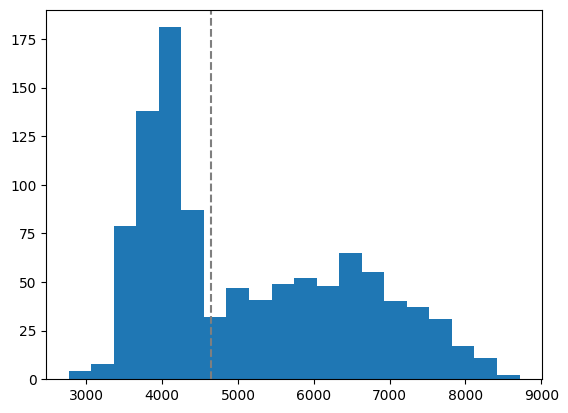

In [75]:
import matplotlib.pyplot as plt
import numpy as np

pattern = "../logs/fig1-full-mnist-bond/nodes-64-*"
diffs = []
for file_path in glob.glob(pattern):
    if os.path.isfile(file_path):
        mod_time, birth_time = get_file_times(file_path)
        mod_time_str = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(mod_time))
        
        if birth_time is not None:
            birth_time_str = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(birth_time))
            time_diff = mod_time - birth_time
            diffs.append(time_diff)
        else:
            print("Creation time is not available.")
plt.hist(diffs, bins=20)
plt.axvline(np.median(diffs), ls='--', color="tab:grey")
print(np.percentile(diffs, [2.5, 50, 97.5])/60, "minutes per run")
print(np.sum(diffs)/3600, "hours total")